In [1]:
import warnings
warnings.filterwarnings("ignore")

# 🕹 Jupyter Widgets

<br>

EOmaps provides a set of pre-configured [Jupyter Widgets](https://ipywidgets.readthedocs.io) that can be used to create interactive browser controls for a map. 

These widgets work just like any other [Jupyter Widgets](https://ipywidgets.readthedocs.io), but they have a pre-configured handler to perform commonly used tasks (switching layers, overlay layers, add/remove callbacks etc.)


:::{note}

Widgets are **only for Jupyter Notebooks** and require the additional dependencies: `ipywidgets` and `ipympl`

You can install it with `pip`:
```
pip install ipywidgets, ipympl
```

or with `conda`:
```
conda install -c conda-forge ipywidgets, ipympl
```
:::

**The following pre-defined widgets exist:**

:::{dropdown} Widgets to change the visible layer

```{eval-rst}

.. currentmodule:: eomaps.widgets

.. autosummary:: 
   :nosignatures:
   
   LayerDropdown
   LayerSelect
   LayerSelectMultiple

.. autosummary:: 
   :nosignatures:

   LayerSelectionSlider
   LayerSelectionRangeSlider
   
.. autosummary:: 
   :nosignatures:

   LayerRadioButtons
   LayerToggleButtons

.. autosummary:: 
   :nosignatures:
   
   LayerOverlaySlider

```
:::



:::{dropdown} Widgets to attach callbacks

```{eval-rst}

.. currentmodule:: eomaps.widgets

.. autosummary:: 
   :nosignatures:
   
   ClickAnnotateCheckbox
   ClickMarkCheckbox
   ClickPrintToConsoleCheckbox
   ClickPeekLayerCheckbox


.. autosummary:: 
   :nosignatures:
   
   ClickMarkCheckbox
   ClickPrintToConsoleCheckbox


.. autosummary:: 
   :nosignatures:
   
   PickAnnotateCheckbox
   PickMarkCheckbox
   PickPrintToConsoleCheckbox

:::

## How to use the widgets

To attach a widget to a map, simply initialize the widget and pass the associated [`Maps`](eomaps.Maps) object as first argument.
(e.g. use ``Widget(m)`` to connect the widget to the [`Maps`](eomaps.Maps) object `m`)

For example, here's how you can connect the available layer-selection widgets to the following map:

:::{note}

At the moment, widgets are **not** connected by default!
(e.g. changing the value in one widget will not change the values in others accordingly)

Any contributions to enhance the widget functionalities are highly appreciated!

:::

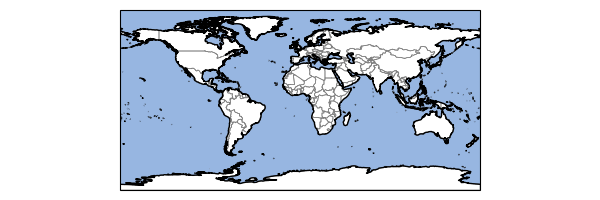

In [2]:
%matplotlib widget
from eomaps import Maps, widgets

m = Maps(figsize=(6, 2), layer="coastline")
m.add_feature.preset.coastline()

m.add_feature.preset.countries(layer="countries")
m.add_feature.preset.ocean(layer="ocean")
m.show_layer("ocean", "countries", "coastline")
m.show()

In [9]:
button = widgets.LayerButton(m, layer="ocean")
toggle_buttons = widgets.LayerToggleButtons(m)
radio_buttons = widgets.LayerRadioButtons(m)
select_single = widgets.LayerSelect(m)
select_multi = widgets.LayerSelectMultiple(m)
dropdown = widgets.LayerDropdown(m)
slider = widgets.LayerSelectionSlider(m)
range_slider = widgets.LayerSelectionRangeSlider(m)

In [15]:
display(button, toggle_buttons, dropdown, radio_buttons, select_single, select_multi, slider, range_slider)

LayerButton(description='ocean', style=ButtonStyle())

LayerToggleButtons(description='Layers', index=2, options=('coastline', 'countries', 'ocean'), value='ocean')

LayerDropdown(description='Layers', index=2, options=('coastline', 'countries', 'ocean'), value='ocean')

LayerRadioButtons(description='Layers', index=2, options=('coastline', 'countries', 'ocean'), value='ocean')

LayerSelect(description='Layers', index=2, options=('coastline', 'countries', 'ocean'), value='ocean')

LayerSelectMultiple(description='Layers', index=(2, 2), options=('coastline', 'countries', 'ocean'), value=('o…

LayerSelectionSlider(description='Layers', index=2, options=('coastline', 'countries', 'ocean'), value='ocean'…

LayerSelectionRangeSlider(description='Layers', index=(2, 2), options=('coastline', 'countries', 'ocean'), val…

:::{tip}
You can also specify custom labels or use combined-layer assignments.

In addition, you can style the widgets as any other Jupyter Widget (more info in the [Widget Styling](https://ipywidgets.readthedocs.io/en/7.6.2/examples/Widget%20Styling.html#) section of the ipywidgets docs.)



In [13]:
custom_selector = widgets.LayerSelectMultiple(
    m,
    layers=[["A nice coastline", "coastline"], 
            ["Overlay 'coastline' + 'ocean'", ("coast", "ocean")],
            ["Transparent overlay: 'coastline' + 'ocean'", ("coast", ("ocean", 0.4))]
           ],
    layout=dict(width='50%', height='80px', )
)
custom_selector

LayerSelectMultiple(description='Layers', layout=Layout(height='80px', width='50%'), options=(('A nice coastli…

In [14]:
custom_button = widgets.LayerButton(m, layer="ocean", description="Custom Ocean Button", layout=dict(width="30ex", height="5ex"))
custom_button.style.button_color = 'lightblue'
custom_button.style.font_weight = 'bold'
custom_button.style.font_size = '24px'
custom_button

LayerButton(description='Custom Ocean Button', layout=Layout(height='5ex', width='30ex'), style=ButtonStyle(bu…